https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario

In [1]:
# conda activate covid19
import numpy as np
import pandas as pd
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__

('1.19.2', '1.2.2', '3.3.4')

In [2]:
caseDf = pd.read_csv('PositiveCases.csv', 
                        header=0, 
                        index_col='Row_ID',
                        parse_dates=['Accurate_Episode_Date','Case_Reported_Date','Test_Reported_Date','Specimen_Date'])

In [3]:
caseDf.head(10)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID
Row_ID,,,,,,,,,,
1,2020-03-24,2020-03-30,2020-03-30,2020-03-29,30s,FEMALE,CC,Resolved,No,2253
2,2020-03-18,2020-03-30,2020-03-30,2020-03-18,50s,MALE,TRAVEL,Resolved,No,2236
3,2020-03-16,2020-03-30,2020-03-30,2020-03-26,50s,MALE,NO KNOWN EPI LINK,Fatal,No,2253
4,2020-03-11,2020-03-30,2020-03-30,2020-03-27,30s,MALE,CC,Resolved,No,2236
5,2020-03-25,2020-03-30,2020-03-30,2020-03-25,30s,FEMALE,OB,Resolved,Yes,2236
6,2020-03-19,2020-03-30,2020-03-30,2020-03-21,60s,MALE,NO KNOWN EPI LINK,Resolved,No,2236
7,2020-03-22,2020-03-30,2020-03-30,2020-03-27,20s,MALE,TRAVEL,Resolved,No,2253
8,2020-03-29,2020-04-01,2020-04-01,2020-03-30,40s,MALE,OB,Resolved,Yes,2253
9,2020-03-20,2020-03-28,2020-03-28,2020-03-28,60s,MALE,CC,Fatal,No,2253


In [4]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312428 entries, 1 to 312428
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Accurate_Episode_Date  312428 non-null  datetime64[ns]
 1   Case_Reported_Date     312428 non-null  datetime64[ns]
 2   Test_Reported_Date     301343 non-null  datetime64[ns]
 3   Specimen_Date          310565 non-null  datetime64[ns]
 4   Age_Group              312428 non-null  object        
 5   Client_Gender          312428 non-null  object        
 6   Case_AcquisitionInfo   312428 non-null  object        
 7   Outcome1               312428 non-null  object        
 8   Outbreak_Related       312428 non-null  object        
 9   Reporting_PHU_ID       312428 non-null  int64         
dtypes: datetime64[ns](4), int64(1), object(5)
memory usage: 26.2+ MB


In [5]:
# add in a year and week number
caseDate = 'Accurate_Episode_Date'
caseDf['Case_Year'] = caseDf[caseDate].dt.isocalendar().year
caseDf['Case_WeekNo'] = caseDf[caseDate].dt.isocalendar().week
caseDf.head(10)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Case_Year,Case_WeekNo
Row_ID,,,,,,,,,,,,
1,2020-03-24,2020-03-30,2020-03-30,2020-03-29,30s,FEMALE,CC,Resolved,No,2253,2020,13
2,2020-03-18,2020-03-30,2020-03-30,2020-03-18,50s,MALE,TRAVEL,Resolved,No,2236,2020,12
3,2020-03-16,2020-03-30,2020-03-30,2020-03-26,50s,MALE,NO KNOWN EPI LINK,Fatal,No,2253,2020,12
4,2020-03-11,2020-03-30,2020-03-30,2020-03-27,30s,MALE,CC,Resolved,No,2236,2020,11
5,2020-03-25,2020-03-30,2020-03-30,2020-03-25,30s,FEMALE,OB,Resolved,Yes,2236,2020,13
6,2020-03-19,2020-03-30,2020-03-30,2020-03-21,60s,MALE,NO KNOWN EPI LINK,Resolved,No,2236,2020,12
7,2020-03-22,2020-03-30,2020-03-30,2020-03-27,20s,MALE,TRAVEL,Resolved,No,2253,2020,12
8,2020-03-29,2020-04-01,2020-04-01,2020-03-30,40s,MALE,OB,Resolved,Yes,2253,2020,13
9,2020-03-20,2020-03-28,2020-03-28,2020-03-28,60s,MALE,CC,Fatal,No,2253,2020,12


In [6]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312428 entries, 1 to 312428
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Accurate_Episode_Date  312428 non-null  datetime64[ns]
 1   Case_Reported_Date     312428 non-null  datetime64[ns]
 2   Test_Reported_Date     301343 non-null  datetime64[ns]
 3   Specimen_Date          310565 non-null  datetime64[ns]
 4   Age_Group              312428 non-null  object        
 5   Client_Gender          312428 non-null  object        
 6   Case_AcquisitionInfo   312428 non-null  object        
 7   Outcome1               312428 non-null  object        
 8   Outbreak_Related       312428 non-null  object        
 9   Reporting_PHU_ID       312428 non-null  int64         
 10  Case_Year              312428 non-null  UInt32        
 11  Case_WeekNo            312428 non-null  UInt32        
dtypes: UInt32(2), datetime64[ns](4), int64(1), o

In [7]:
for column in enumerate(['Age_Group','Client_Gender','Case_AcquisitionInfo','Outcome1','Outbreak_Related']):
    print(column[1], '=>', caseDf[column[1]].unique().tolist())

Age_Group => ['30s', '50s', '60s', '20s', '40s', '70s', '80s', '<20', '90+', 'UNKNOWN']
Client_Gender => ['FEMALE', 'MALE', 'UNSPECIFIED', 'GENDER DIVERSE']
Case_AcquisitionInfo => ['CC', 'TRAVEL', 'NO KNOWN EPI LINK', 'OB', 'MISSING INFORMATION', 'UNSPECIFIED EPI LINK']
Outcome1 => ['Resolved', 'Fatal', 'Not Resolved']
Outbreak_Related => ['No', 'Yes']


In [8]:
# From the original notebook ... we don't really need this ...
ageGroup = {'UNKNOWN':0, '<20':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90+':9}
clientGender = {'UNSPECIFIED':0, 'FEMALE':1, 'MALE':2, 'GENDER DIVERSE':3}
caseAcquistionInfo = {'MISSING INFORMATION':0, 'CC':1, 'OB':2, 'TRAVEL':3, 'NO KNOWN EPI LINK':4, 'UNSPECIFIED EPI LINK':5}
outcome1 = {'Resolved':0, 'Not Resolved':1, 'Fatal':2}
outbreakRelated = {'No':0, 'Yes':1}

In [9]:
caseCountByYearWeek = caseDf.groupby(['Case_Year','Case_WeekNo'])[[caseDate]].count().reset_index()
caseCountByYearWeek.rename(columns = {caseDate:'Case_Count'}, inplace = True) 
caseCountByYearWeek['YearWeek'] = caseCountByYearWeek['Case_Year'].astype(str) + '-' + caseCountByYearWeek['Case_WeekNo'].astype(str)
caseCountByYearWeek.head()

,Case_Year,Case_WeekNo,Case_Count,YearWeek
0,2020,1,5,2020-1
1,2020,2,2,2020-2
2,2020,3,2,2020-3
3,2020,4,10,2020-4
4,2020,5,5,2020-5


In [10]:
from matplotlib import pyplot as plt

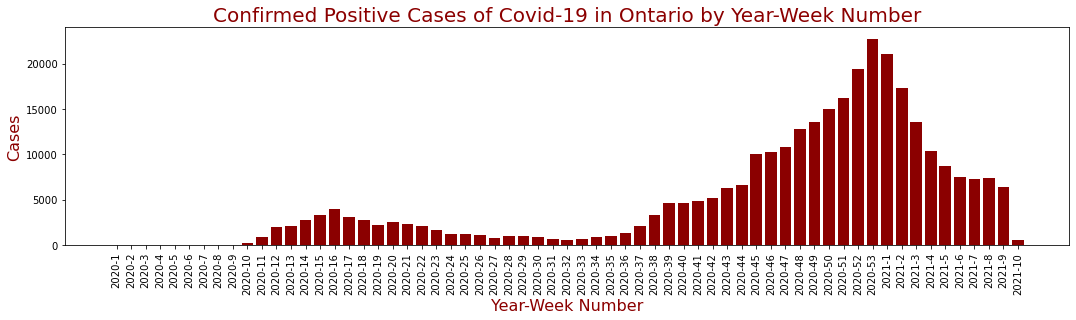

In [12]:
xAxis = caseCountByYearWeek['YearWeek'].tolist()
yAxis = np.array(caseCountByYearWeek['Case_Count'].tolist())

count = len(xAxis)
pos = range(count)

columnColor='darkred'

fig = plt.figure(figsize=(18,4))
plt.bar(pos, yAxis, color=columnColor)
plt.xticks(pos, xAxis, rotation=90)
plt.xlabel('Year-Week Number', color=columnColor, fontsize=16)

plt.ylabel("Cases", color=columnColor, fontsize=16)
plt.ylim(0, 24000)

plt.title('Confirmed Positive Cases of Covid-19 in Ontario by Year-Week Number', color=columnColor, fontsize=20)
plt.show()

In [13]:
deathCountByYearWeek = caseDf.loc[caseDf.Outcome1 == 'Fatal'].groupby(['Case_Year','Case_WeekNo'])[[caseDate]].count().reset_index()
deathCountByYearWeek.rename(columns = {caseDate:'Case_Count'}, inplace = True) 
deathCountByYearWeek['YearWeek'] = deathCountByYearWeek['Case_Year'].astype(str) + '-' + deathCountByYearWeek['Case_WeekNo'].astype(str)

In [14]:
xAxis = deathCountByYearWeek['YearWeek'].tolist()
yAxis = np.array(deathCountByYearWeek['Case_Count'].tolist())

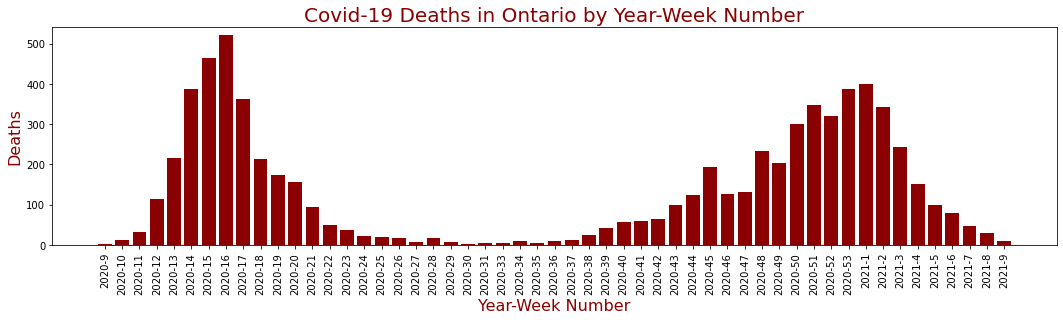

In [17]:
count = len(xAxis)
pos = range(count)

columnColor='darkred'

fig = plt.figure(figsize=(18,4))
plt.bar(pos, yAxis, color=columnColor)
plt.xticks(pos, xAxis, rotation=90)
plt.xlabel('Year-Week Number', color=columnColor, fontsize=16)

plt.ylabel("Deaths", color=columnColor, fontsize=16)
plt.ylim(0, 540)

plt.title('Covid-19 Deaths in Ontario by Year-Week Number', color=columnColor, fontsize=20)
plt.show()